In [1]:
%matplotlib inline
import quandl
import pandas as pd
from tsmom_model import *
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot
import seaborn as sns
from datetime import datetime
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
contract_size=load_maps()
fx_map=contract_size.to_dict()['Currency']
tick_map=contract_size.to_dict()['Tick Value']
sector_map=contract_size.to_dict()['Sector']

In [10]:
price=cleansed_data()

ICE-BRENT CRUDE OIL    True
ICE-GAS OIL            True
Name: NYM-NY HARBOR ULSD, dtype: bool
CME-NIKKEI 225 INDEX COMB.    True
SGX DT-NIKKEI 225 ETS         True
Name: OSX-NIKKEI 225 INDEX, dtype: bool
NYM-LIGHT CRUDE OIL    True
NYM-NY HARBOR ULSD     True
ICE-GAS OIL            True
Name: ICE-BRENT CRUDE OIL, dtype: bool
ICE-BRENT CRUDE OIL    True
NYM-NY HARBOR ULSD     True
Name: ICE-GAS OIL, dtype: bool
SGX DT-NIKKEI 225 ETS    True
OSX-NIKKEI 225 INDEX     True
Name: CME-NIKKEI 225 INDEX COMB., dtype: bool
S&P MidCap 400            True
Dow Jones                 True
CME-MINI S&P 500 INDEX    True
Name: CME-S&P 500 INDEX COMP, dtype: bool
CME-NIKKEI 225 INDEX COMB.    True
OSX-NIKKEI 225 INDEX          True
Name: SGX DT-NIKKEI 225 ETS, dtype: bool
CME-S&P 500 INDEX COMP    True
Russell 2000              True
Name: S&P MidCap 400, dtype: bool


/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


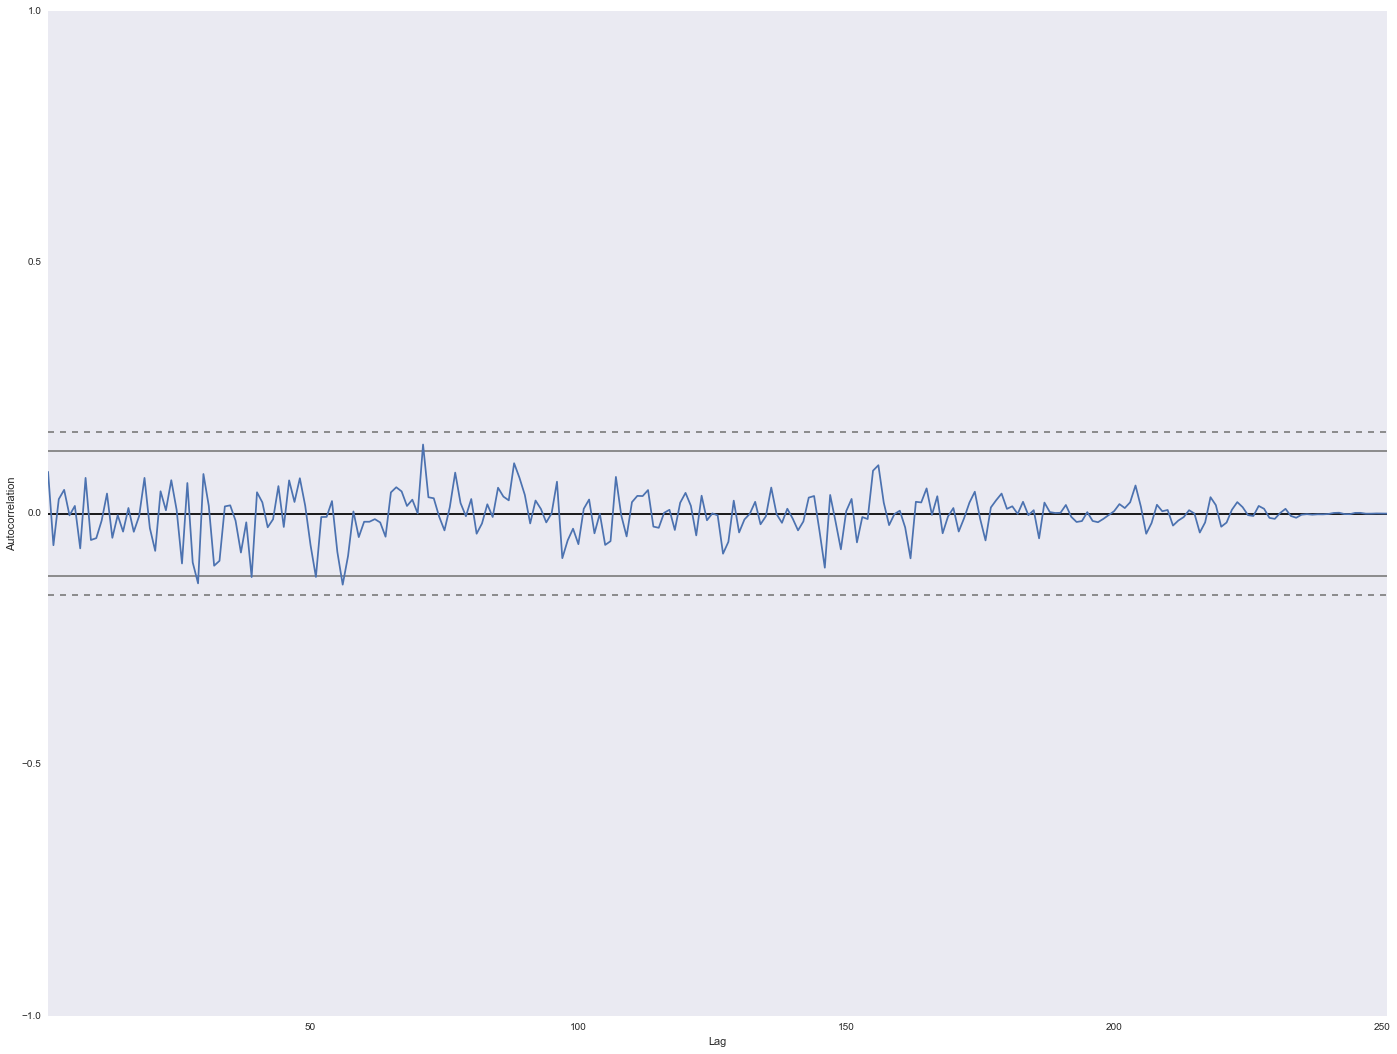

In [11]:
series = price.DAX.resample(rule='m',how='last').pct_change().dropna()
autocorrelation_plot(series)
pyplot.show()

In [5]:
ac = pd.DataFrame()
for mkt in price.columns:
    terms=[]
    for i in range(1,24):
        terms.append(price[mkt].resample(rule='m',how='last').pct_change().dropna().autocorr(i))
    ac[mkt]=terms

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()


KeyboardInterrupt: 

In [ ]:
ac.T.plot(kind='box')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()


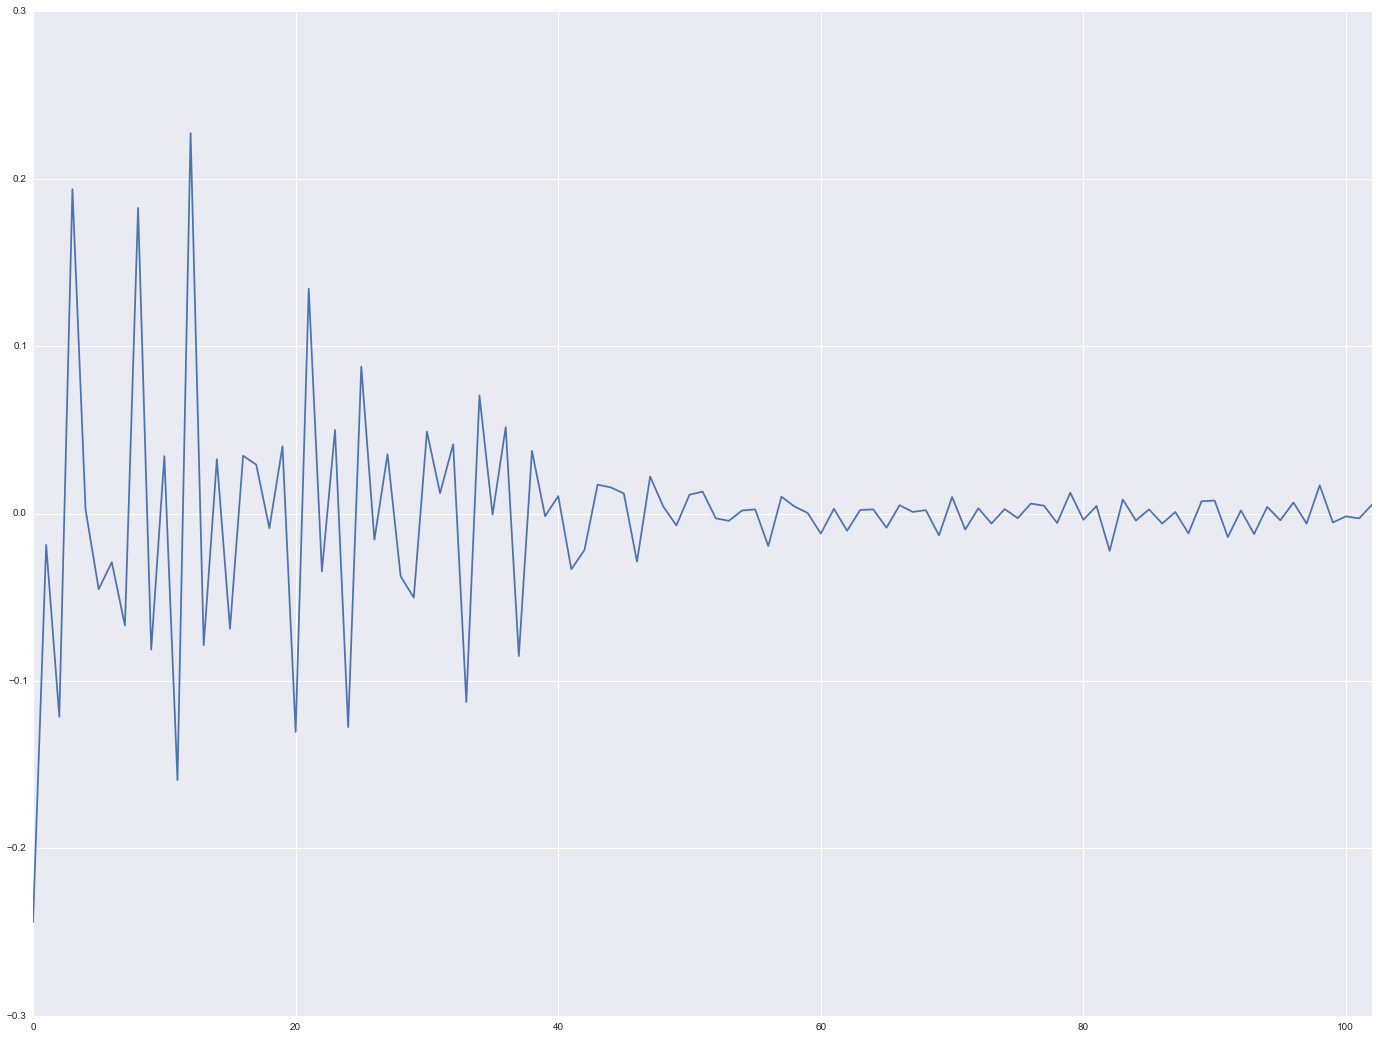

In [24]:
ac_weekly = pd.DataFrame()
for mkt in df.columns:
    terms=[]
    for i in range(1,104):
        terms.append(df[mkt].resample(rule='w',how='last').pct_change().dropna().autocorr(i))
    ac_weekly[mkt]=terms
ac_weekly.mean(axis=1).plot()

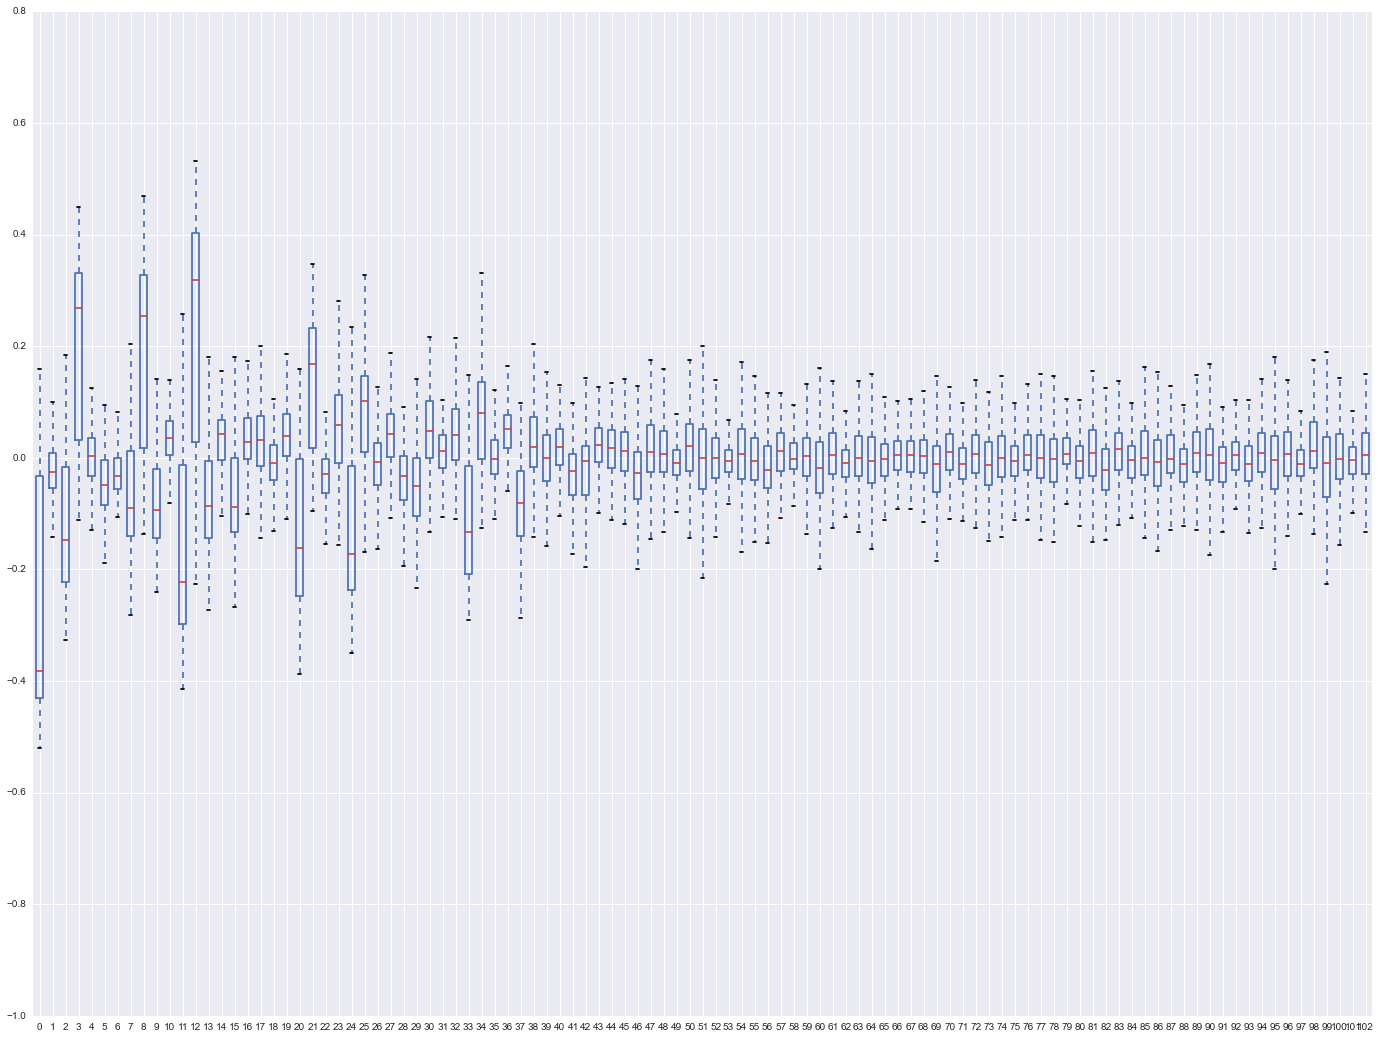

In [25]:
ac_weekly.T.plot(kind='box')

TODO: Calculate rolling windows of autocorrelation 

# Monthly data group by sector and more importanlty liquidity


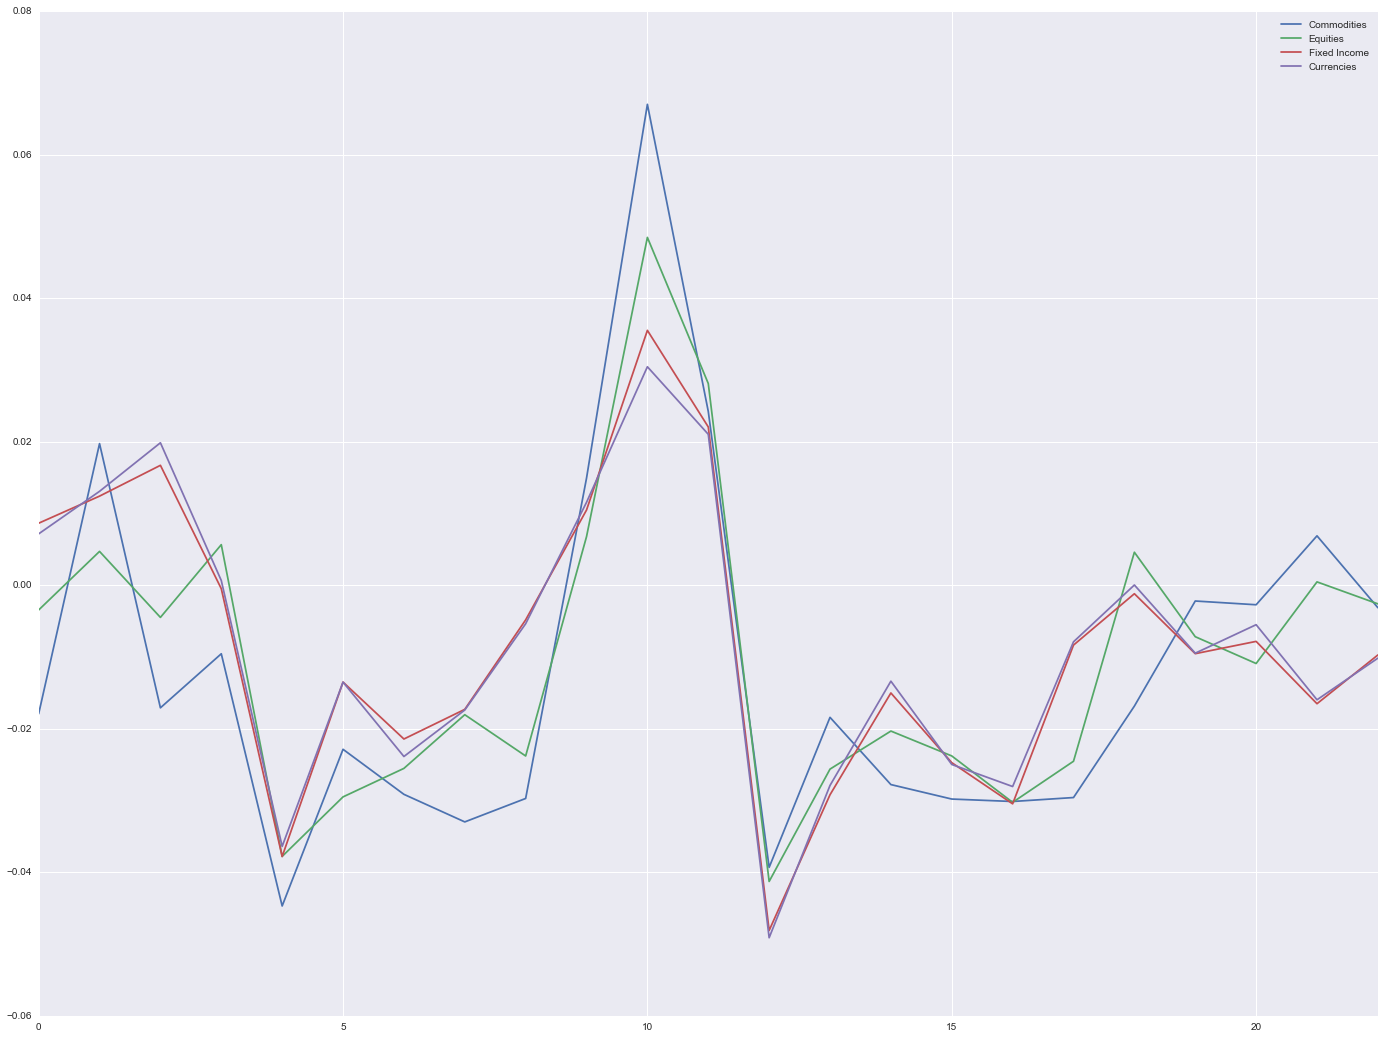

In [66]:
data=ac.copy().T
df = pd.DataFrame()
sectors=['Commodities','Equities','Fixed Income','Currencies']
t=pd.DataFrame()
for s in sectors:
    for mkt in data.index:
        try:
            if sector_map[mkt]==s:
                t[mkt]=data.T[mkt]
        except:
            continue
    df[s]=t.T.mean()
df.plot()

In [6]:
volume=calculate_dollar_volume(df)

tsmom_model.py:18: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data=pd.read_csv('Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='mean')
tsmom_model.py:20: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  v=pd.read_csv('volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='sum')
tsmom_model.py:22: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=250,center=False).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='m',how='mean')[:'2016']
tsmom_model.py:22: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='m',how='mean')[:'2016']
tsmom_model.py:25: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future versio

MEXDER-10YR BOND
ZCE-RAPESEED MEAL
BMF-US DOLLAR
NORDPOOL-ENO QTR
EEX-MONTHLY PEAKLOAD
LIFFE-10Y E SWAPNOTE
LIFFE-2YR E SWAPNOTE
OSX-NIKKEI 225 INDEX
ENDEX-TTF GAS BASE LOAD
ENDEX-TTF GAS BASE LOAD QTR
ENDEX-TTF GAS BASE LOAD SEASON
Canadian Bankers Acceptance
Russian Ruble


tsmom_model.py:36: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  px=cleansed.resample(rule='m',how='last')


In [7]:
bkts=[]
number_of_buckets=4
year='2016-12-31'
for i in range(0,number_of_buckets,1):
    mkts=quantile_columns(volume,year,number_of_buckets,i)
    bkts.append(mkts)

In [42]:
q_ac=pd.DataFrame()    
j=1
for mkts in bkts:
    ac = pd.DataFrame()
    for m in mkts:
        terms=[]
        for i in range(1,24):
            terms.append(price[m].resample(rule='m',how='last').pct_change().dropna().autocorr(i))
        ac[m]=terms
    q_ac[str(j)]=ac.T.mean()
    j=j+1

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()


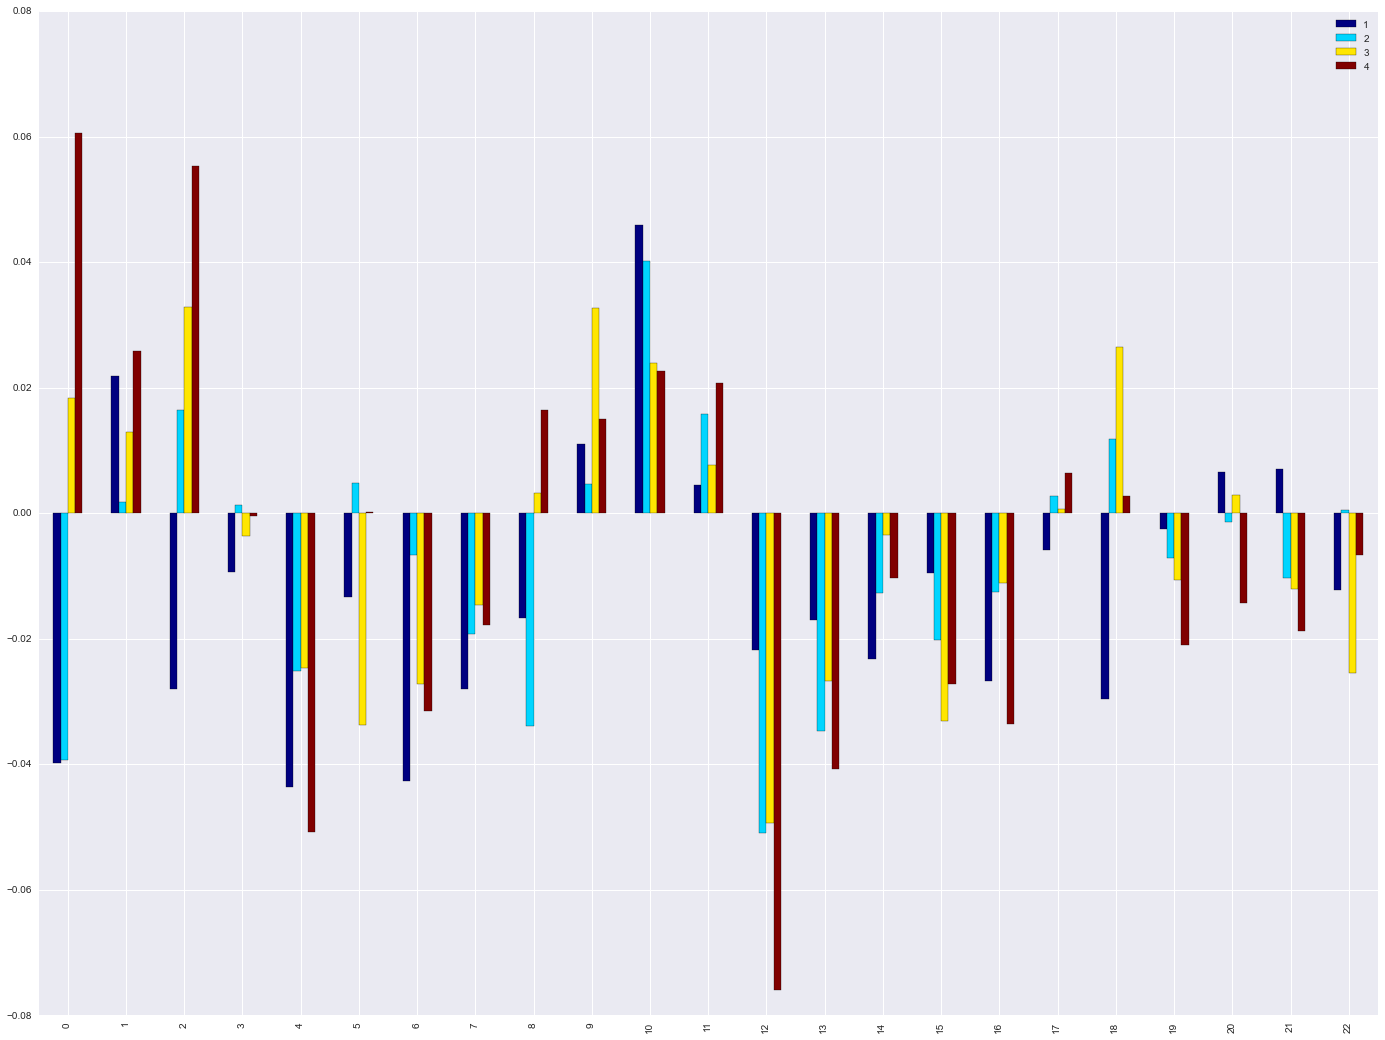

In [48]:
q_ac.plot(colormap='jet',kind='bar')

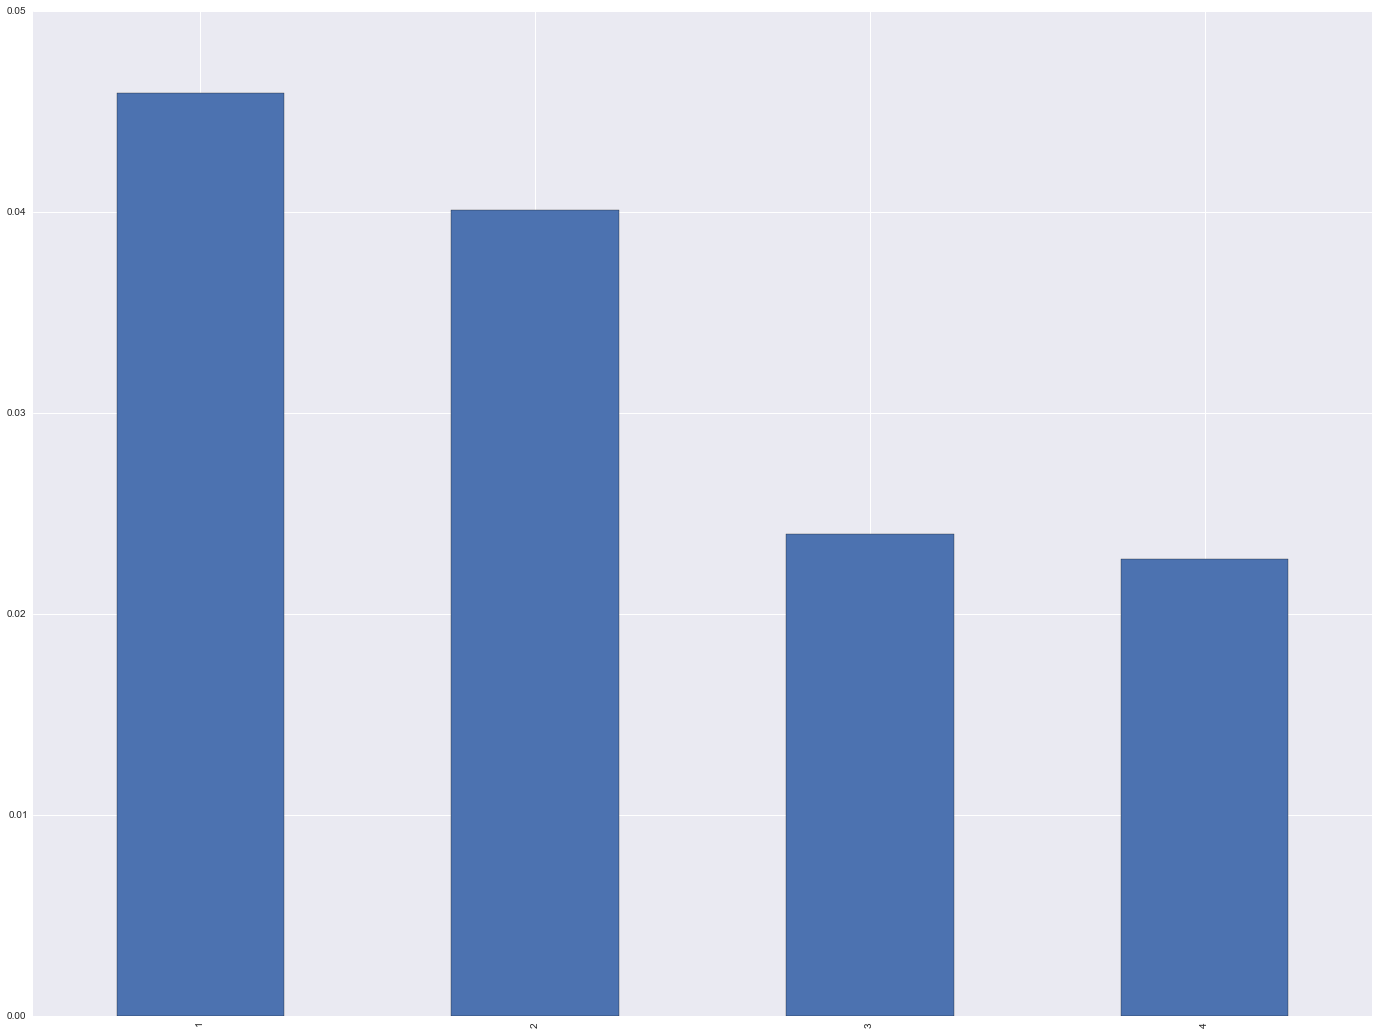

In [56]:
q_ac.T[10].plot(kind='bar')